<a href="https://colab.research.google.com/github/Lilhxr/AlgorithmDiagram/blob/master/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate


KeyboardInterrupt: ignored

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive  -o nonempty


In [0]:
!pip install -q keras


In [0]:
!pip install -q numpy
!pip install -q matplotlib
!pip install -q scipy
!pip install -q imread
!pip install -q imresize

     |████████████████████████████████| 1.5MB 6.6MB/s 
  ERROR: Could not find a version that satisfies the requirement imresize (from versions: none)
ERROR: No matching distribution found for imresize


In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


W0709 03:12:28.793931 140035343882112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 03:12:28.832804 140035343882112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 03:12:28.841304 140035343882112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 03:12:28.890148 140035343882112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0709 03:12:28.893892 140035343882112 deprecation_wrapp

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


W0709 03:12:29.010648 140035343882112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 03:12:29.022821 140035343882112 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0709 03:12:29.166287 140035343882112 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 254us/step - loss: 0.2744 - acc: 0.9160 - val_loss: 0.0572 - val_acc: 0.9833
Epoch 2/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0902 - acc: 0.9724 - val_loss: 0.0405 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0680 - acc: 0.9801 - val_loss: 0.0431 - val_acc: 0.9853
Epoch 4/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0565 - acc: 0.9830 - val_loss: 0.0380 - val_acc: 0.9870
Epoch 5/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0487 - acc: 0.9853 - val_loss: 0.0320 - val_acc: 0.9890
Epoch 6/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0442 - acc: 0.9867 - val_loss: 0.0331 - val_acc: 0.9900
Epoch 7/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0390 - acc: 0.9883 - val_loss: 0.0327 -

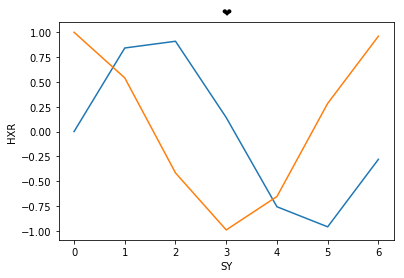

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 2 * np.pi, 1)
#括号里前两个是x的范围 比如0-2pi
y_sin = np.sin(x)
y_cos = np.cos(x)

#打印坐标，标题，xy轴
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('SY')
plt.ylabel('HXR')
plt.title('❤')
plt.show()




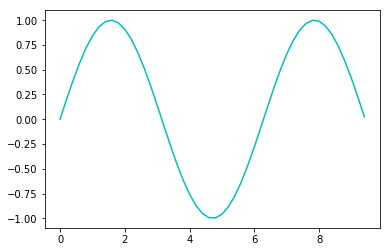

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0,3 *np.pi,0.2)
y=np.sin(x)

plt.show()
plt.plot(x,y,"c")  
#改变颜色在“c"

In [36]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
#计算给定集合中所有点对之间的距离

x = np.array([[0, 1], [1, 0], [2, 0],[3,3]])
print(x)

d = squareform(pdist(x, 'euclidean'))
print(d)

[[0 1]
 [1 0]
 [2 0]
 [3 3]]
[[0.         1.41421356 2.23606798 3.60555128]
 [1.41421356 0.         1.         3.60555128]
 [2.23606798 1.         0.         3.16227766]
 [3.60555128 3.60555128 3.16227766 0.        ]]


In [0]:
!pip install -q imread